In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-insurance-charges-using-age-gender/insurance.csv


In [2]:
df = pd.read_csv('/kaggle/input/prediction-of-insurance-charges-using-age-gender/insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.drop(['index'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*No missing Values*

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Visualization**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


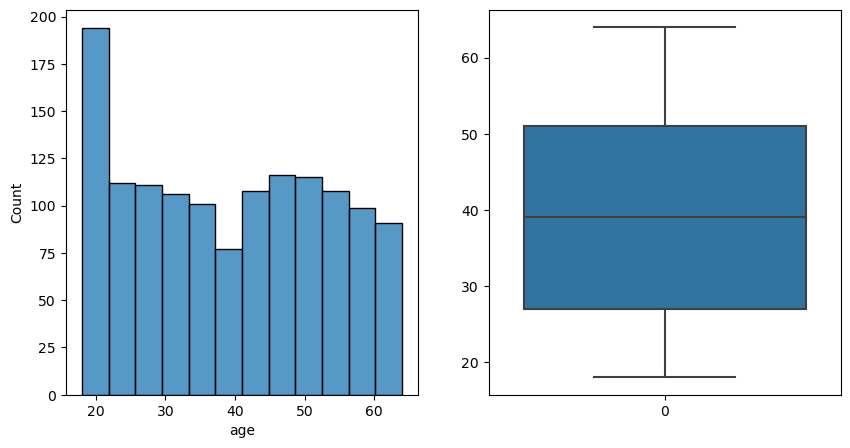

In [7]:
f, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(df.age,ax=axes[0])
sns.boxplot(df.age, ax=axes[1])
plt.show()

Age has no outliers. 20s seem to have a lot of more entries than every other age.

<Axes: xlabel='sex', ylabel='age'>

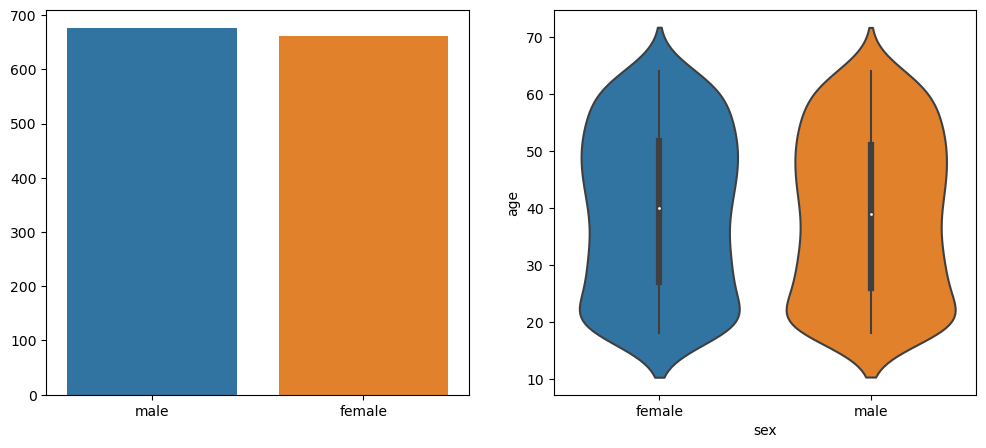

In [8]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.barplot(x=df.sex.value_counts().index, y=df.sex.value_counts().values, ax=axes[0])
sns.violinplot(data=df, x="sex", y="age",ax=axes[1])

*Both sex seem to have a similar distribution of ages and also the number of ocorrences are very similar*

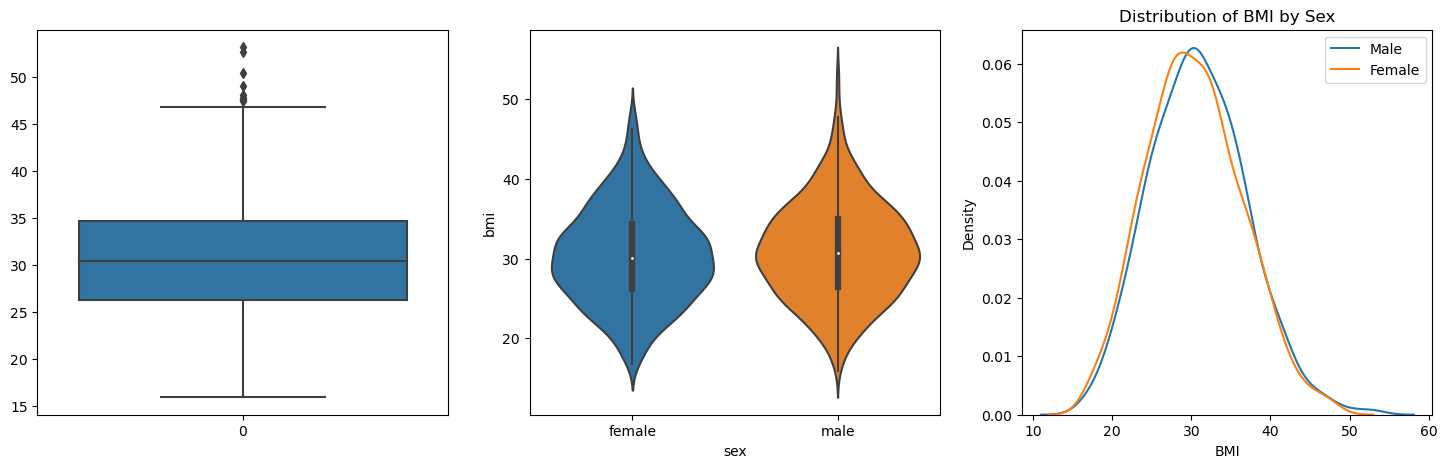

In [9]:
f, axes = plt.subplots(1, 3,figsize=(18,5))
sns.boxplot(df.bmi, ax=axes[0])
sns.violinplot(data=df, x="sex", y="bmi",ax=axes[1])
sns.kdeplot(df[df['sex']=='male']['bmi'], ax=axes[2], label='Male', fill=False)
sns.kdeplot(df[df['sex']=='female']['bmi'], ax=axes[2], label='Female', fill=False)
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Density')
axes[2].set_title('Distribution of BMI by Sex')
axes[2].legend()

*BMI has some outliers. From what we can see male tend to have slightly higher BMI*

<Axes: xlabel='smoker', ylabel='charges'>

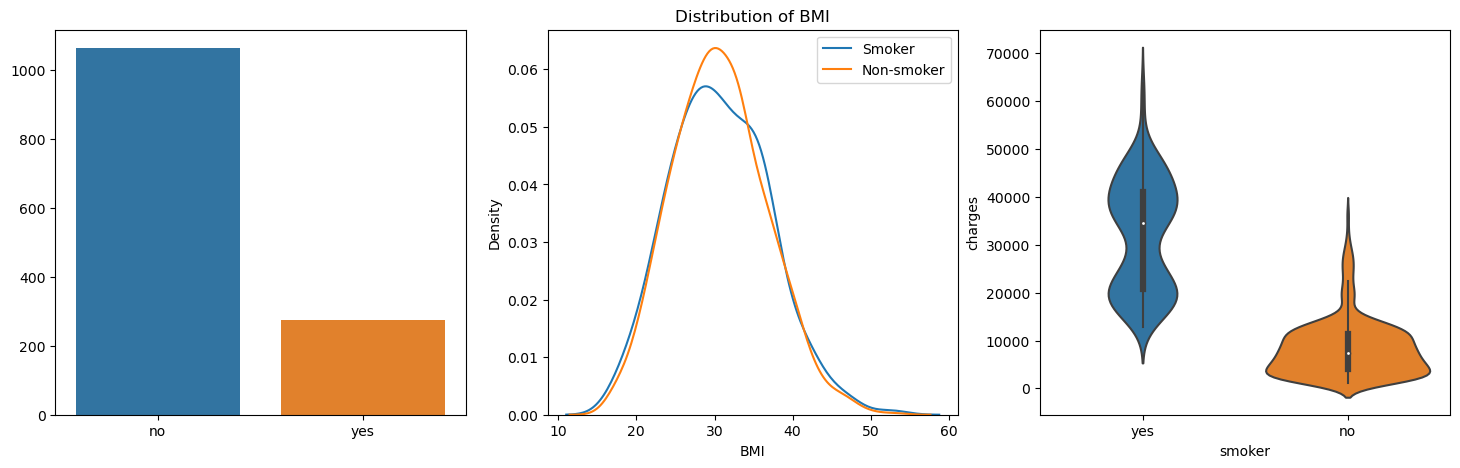

In [10]:
f, axes = plt.subplots(1, 3,figsize=(18,5))
sns.barplot(x=df.smoker.value_counts().index, y=df.smoker.value_counts().values, ax=axes[0])
sns.kdeplot(df[df['smoker']=='yes']['bmi'], ax=axes[1], label='Smoker', fill=False)
sns.kdeplot(df[df['smoker']=='no']['bmi'], ax=axes[1], label='Non-smoker', fill=False)
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of BMI')
axes[1].legend()
sns.violinplot(data=df, x='smoker', y='charges',ax=axes[2])

*There are a lot more non-smokers than smokers. We can't say anything about differences in BMI between smokers and non-smokers. Charges tend to be a lot higher for smokers*